# BIO213 Assignment 2

## Gitansh Raj satija 2019241

### Question 1

### Answer a) and b)

In [3]:
# Helper functions


def calc1(i):                              #this function is used to determine the number of residues with P(H)>=1 
    count = 0                              #in a window of size 6 starting at ith index 
    for k in range(6):
        if dict1[s[i + k]] >= 1:
            count += 1
    return count                           #return the count of residues with P(H)>=1


def left_extend(j):                       #function to extend a possible helice to its left in window size of 4 
    while j - 3 >= 0:                     #the base condition is that the fragment of size 4 should exist
        temp_count = 0
        for k in range(0, 4):              
            temp_count += dict1[s[j - k]]
        if temp_count >= 4:                #If the sum of P(H) values in a fragment of window size is at least 4
            for k in range(0, 4):          #it is possible to have a helix there and then we continue to the fragment of size 4 
                alpha[j - k] = 'H'
            j -= 1
        else:                              #if a fragment of size 4 has sum of P(H) values<4, we stop looking for any more
            break                          #fragments in this iteration and also don't mark the residues in this as Helix


def right_extend(j):                       #function to extend a possible helice to its right in window size of 4
    while j + 4 <= len(s):                 #the base condition is that the fragment of size 4 should exist
        temp_count = 0
        for k in range(0, 4):           
            temp_count += dict1[s[j + k]]
        if temp_count >= 4:                #If the sum of P(H) values in a fragment of window size is at least 4
            for k in range(0, 4):          #it is possible to have a helix there and then we continue to the fragment of size 4
                alpha[j + k] = 'H'
            j += 1
        else:                              #if a fragment of size 4 has sum of P(H) values<4, we stop looking for any more
            break                          #fragments in this iteration and also don't mark the residues in this as Helix


def calc2(i):                              #this function is used to determine the number of residues with P(S)>1 
    count = 0                              #in a window of size 5 starting at ith index
    for k in range(5):
        if dict2[s[i + k]] > 1:
            count += 1
    return count                           #return the count of residues with P(S)>1


def left_extend_b(j):                      #function to extend a possible strand to its left in window size of 4 
    while j - 3 >= 0:                      #the base condition is that the fragment of size 4 should exist
        temp_count = 0
        for k in range(0, 4):
            temp_count += dict2[s[j - k]]
        if temp_count > 4:                 #If the sum of P(S) values in a fragment of window size is more than 4
            for k in range(0, 4):          #it is possible to have a strand there and then we continue to the fragment of size 4
                beta[j - k] = 'S'
            j -= 1
        else:                              #if a fragment of size 4 has sum of P(S) not more than 4, we stop looking for any 
            break                          #more fragments in this iteration and also don't mark the residues in this as Strand


def right_extend_b(j):                     #function to extend a possible strand to its left in window size of 4
    while j + 4 <= len(s):                 #the base condition is that the fragment of size 4 should exist
        temp_count = 0            
        for k in range(0, 4):
            temp_count += dict2[s[j + k]]
        if temp_count > 4:                #If the sum of P(S) values in a fragment of window size is at least 4
            for k in range(0, 4):          #it is possible to have a strand there and then we continue to the fragment of size 4
                beta[j + k] = 'S'
            j += 1
        else:                              #if a fragment of size 4 has sum of P(S) not more than 4, we stop looking for any
            break                          #more fragments in this iteration and also don't mark the residues in this as Strand
 
            
#Initializing the required variables, including given string

s = 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDTVYCPRHVICTAEDMLNPNYEDLLIRKSNHSFLVQAGNVQLRVIGHSMQNCLLRLKVDTSNPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNHTIKGSFLNGSCGSVGF'
alpha = []                   #will store possible residues that might be a part of helix
beta = []                    #will store possible residues that might be a part of strand
ans = []                     #will store final result
for i in range(len(s)):
    alpha = alpha + ["_"]
    beta = beta + ["_"]
    ans = ans + ["_"]
    
    
#Initializing the dictionary where dict1 storesthe P(H) values and dict2 stores the P(S) values of the possible residues 

dict1 = {'E': 1.53, 'A': 1.45, 'L': 1.34, 'H': 1.24, 'M': 1.20, 'Q': 1.17, 'W': 1.14, 'V': 1.14, 'F': 1.12, 'K': 1.07,
         'I': 1.00, 'D': 0.98, 'T': 0.82, 'S': 0.79, 'R': 0.79, 'C': 0.77, 'N': 0.73, 'Y': 0.61, 'P': 0.59, 'G': 0.53}
dict2 = {'M': 1.67, 'V': 1.65, 'I': 1.60, 'C': 1.30, 'Y': 1.29, 'F': 1.28, 'Q': 1.23, 'L': 1.22, 'T': 1.20, 'W': 1.19,
         'A': 0.97, 'R': 0.90, 'G': 0.81, 'D': 0.80, 'K': 0.74, 'S': 0.72, 'H': 0.71, 'N': 0.65, 'P': 0.62, 'E': 0.26}


#Generating possible positions of helix formation

i = 0
while i < len(s) - 5:                   #checking all possible windows of size 6
    count = calc1(i)                    #calculating number of residues with P(H)>=1
    if count >= 4:                      #If there are at least 4 resiues with P(H)>=1, that strech qualifies for a nucleation 
        for k in range(6):              #site and can possibly have an heix
            alpha[i + k] = 'H'
        right_extend(i + 3)             #If the strech qualified as a nucleation site then we can extend it in both directions 
        left_extend(i + 2)              #to check fragments if steches of size 4 can also possibly be a part of the heix.
    i += 1
    

#Generating possible positions of strand formation

i = 0
while i < len(s) - 4:                   #checking all possible windows of size 5
    count = calc2(i)                    #calculating number of residues with P(S)>1
    if count >= 3:                      #If there are at least 3 resiues with P(S)>1, that strech qualifies for a nucleation
        for k in range(5):              #site and can possibly have an strand
            beta[i + k] = 'S'
        right_extend_b(i + 2)           #If the strech qualified as a nucleation site then we can extend it in both directions
        left_extend_b(i + 2)            #to check fragments if steches of size 4 can also possibly be a part of the strand.
    i += 1

    
#Generating the secondary structure as per our algorithm

i = 0
while i < len(s):
    if alpha[i] == '_' and beta[i] == '_':       #We assume that the residues not predicted as helix or strand are turns.                            
        ans[i] = 'T'
        i += 1
    elif alpha[i] == 'H' and beta[i] == '_':     #Residues where only helix was possible but not strand.
        ans[i] = 'H'
        i += 1
    elif alpha[i] == '_' and beta[i] == 'S':     #Residues where only strand was possible but not helix.
        ans[i] = 'S'
        i += 1
    else:                                        
        t_count = 0
        k = 0                                      
        #A region containing overlapping helical and strand assignments is considered as a helix (or
        #strand) if average propensity of alpha-helix (beta-strand) is greater than that of beta-strand
        #(alpha-helix). Which is similar to comaparing some of propensities as value of strech is same
        while i + k < len(s) and alpha[i + k] == 'H' and beta[i + k] == 'S':
            k += 1
        a_count = 0
        b_count = 0
        for j in range(0, k):
            a_count += dict1[s[i + j]]
            b_count += dict2[s[i + j]]
        if a_count >= b_count:
            for j in range(0, k):
                ans[i + j] = 'H'
        else:
            for j in range(0, k):
                ans[i + j] = 'S'
        i += k

        
#Printing the output in a fashion similar to the Stride webserver, where output is showed in 3 lines, each containing 50
#characters of the given string in ordered manner
print("Predicted secondary structural elements using SRour agorithm is:")
print()
print("1"+"       "+ s[0:50]+"     50")
print("        "+ "".join(ans)[0:50])
print()
print("51"+"      "+ s[50:100]+"     100")
print("        "+ "".join(ans)[50:100])
print()
print("101"+"     "+ s[100:150]+"     150")
print("        "+ "".join(ans)[100:150])


#end of code

Predicted secondary structural elements using SRour agorithm is:

1       SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDTVYCPRHVICTAEDML     50
        THHHHHHHHHHHSSSSSSSSSSSSSSHHHHHHHHHSSSSHHHHHHHHHHH

51      NPNYEDLLIRKSNHSFLVQAGNVQLRVIGHSMQNCLLRLKVDTSNPKTPK     100
        HTTHHHHHHHHHHSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSTTTTHS

101     YKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNHTIKGSFLNGSCGSVGF     150
        SSSSSSSSSSSSSSSSSSSSTTSSSSSSSSSSTTTHHHHHHTTTTTTTTT


### Question 2

### Answer a)

####  Predicted secondary structural elements using the STRIDE webserver is:

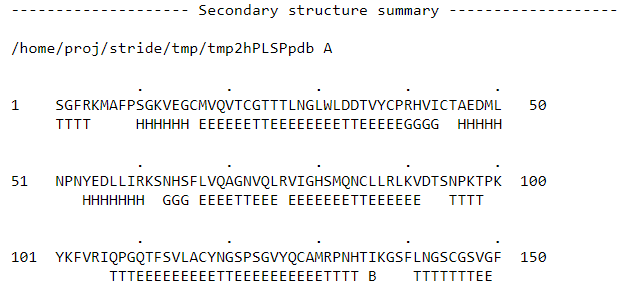

#### On comparing our output with the above output we notice: 
#### Note: We have used the notation where S represents Strand but in STRIDE webserver, E represents strand. Thus while comparing, we take S and E to be depicting same secondary structure part.

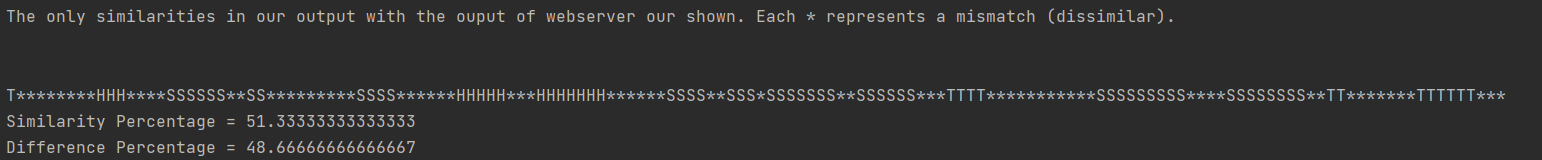

#### The regions differing in both in terms of assigned secondary structure are shown below.
#### Note:
#### 1. A gap (representing coil) in the secondary structure predicted by STRIDE webserver is depicted by a '_' in the below picture for easier understanding.
#### 2. In each set, the first string represents a strech of the given protein sequence whose starting and ending index are mentioned with it. This means that the string between the given indices (both inclusive) differs in terms of assigned secondary structure.
#### 3. The string next to X: represents strech of prediction from our algorithm
#### 4. The string next to Y: reprsents strech of prediction from STRIDE webserver

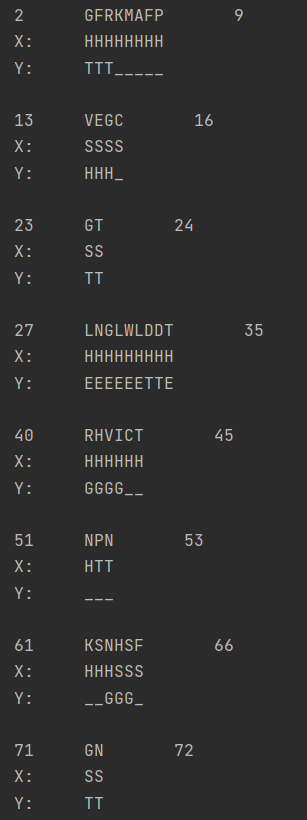
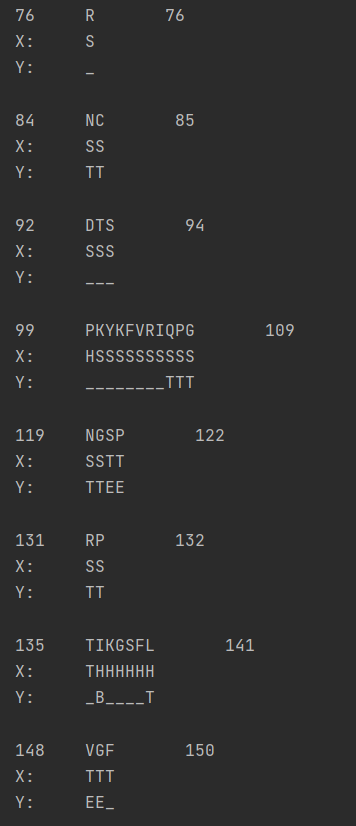

### Answer b) 

#### There are many differences observed in the secondary structues preicted by our algorithm and by the STRIDE webserver.
#### Some of the key points are mentioned below:
##### >The secondary structure predicted by STRIDE webserver contains Strands,Alphahelix,Coils,Brdiges and 310helix. However, in ou algorithm we are only identifying for strands,alphahelix and turns, thus we fail to recognize any coils,bridges or 310helix in the secondary structure.
##### >In our algorithm, we didnt follow any rules to identify a turn, we simply assigned a residue as turn if wasn't predicted to be a part of any strand or alphahelix. But there are a set of rules to be followed for ientifying turns, thus more difference between the output of STRIDE webserver and that of ours are there.
##### >We have implemented a version of Chau Fasman method for prediction of secondary structure. Their method is supposed to be around 55-60% accurate. Thus there will be variations from the STRIDE webservers prediction as it uses more accurate methods for prediction.
##### >In our case,a region containing overlapping helical and strand assignments is considered as a helix (or strand) if average propensity of alpha-helix (beta-strand) is greater than that of beta-strand(alpha-helix). However, this is not an accurate method to assign alphhelix or strands. Thus, deviations from STRIDE websever's predicted secondary structure are there.
##### >Also in our prediction we didnt follow refinement rules like Proline isn't compatible with inner helices or C terminal region.